In [44]:
library(ggplot2)
library(igraph)
library(dplyr)

In [2]:
# Load the data
data <- read.csv("./temp_data/coupled3.csv")
tail(data)

,p,iteration,started_in,A_0,A_1
,<dbl>,<int>,<dbl>,<int>,<int>
59441785,0.5,49999266,1,5,14
59441786,0.5,49999316,0,1,12
59441787,0.5,49999414,1,0,13
59441788,0.5,49999706,0,13,6
59441789,0.5,49999750,1,1,11
59441790,0.5,49999825,1,11,29


In [11]:
# Large avalanche size (> 50)
d_aa <- data |>
  filter(started_in == "0") |>
  select(p, A_0) |>
  filter(A_0 > 50) |>
  group_by (p) |>
  summarise (prob_A_0 = n())

d_ba <- data |>
  filter(started_in == "1") |>
  select(p, A_0) |>
  filter(A_0 > 50) |>
  group_by (p) |>
  summarise (prob_A_0 = n())

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


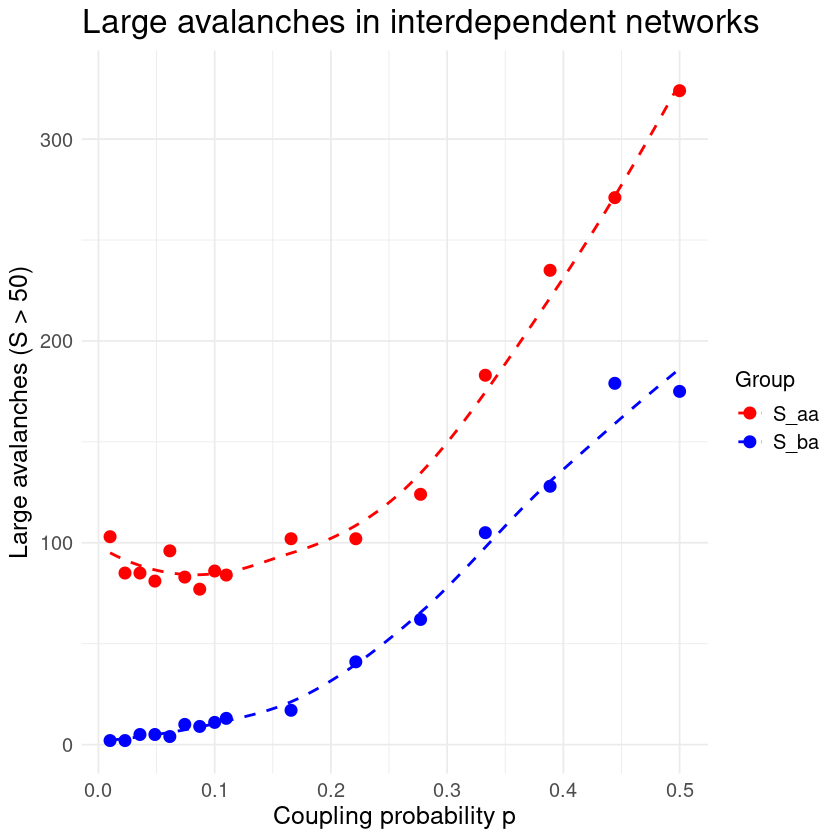

In [19]:
ggplot() +
  # Points for d_aa with custom size and opacity
  geom_point(data = d_aa, aes(x = p, y = prob_A_0, color = "S_aa"), 
             size = 3, alpha = 1) +
  
  # Points for d_ba with custom size and opacity
  geom_point(data = d_ba, aes(x = p, y = prob_A_0, color = "S_ba"), 
             size = 3, alpha = 1) +
  
  # Spline for d_aa with custom line width and opacity
  geom_smooth(data = d_aa, aes(x = p, y = prob_A_0, color = "S_aa"), 
              method = "loess", se = FALSE, 
              linetype = "dashed", size = 0.8, alpha = 0.6) +
  
  # Spline for d_ba with custom line width and opacity
  geom_smooth(data = d_ba, aes(x = p, y = prob_A_0, color = "S_ba"), 
              method = "loess", se = FALSE, 
              linetype = "dashed", size = 0.8, alpha = 0.6) +
  
  theme_minimal() +
  labs(title = "Large avalanches in interdependent networks",
       x = "Coupling probability p",
       y = "Large avalanches (S > 50)",
       color = "Group") +
  scale_color_manual(values = c("S_aa" = "red", "S_ba" = "blue")) +
  theme(
    plot.title = element_text(size = 20),
    axis.title.x = element_text(size = 15),
    axis.title.y = element_text(size = 15),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 13)
  )


In [20]:
# Avalanche sizes (> 10)
s_aa <- data |>
  filter(started_in == "0") |>
  select(A_0) |>
  group_by (A_0) |>
  summarise (A_aa = n())

s_ba <- data |>
  filter(started_in == "1") |>
  select(A_0) |>
  group_by (A_0) |>
  summarise (A_ba = n())

s_ab <- data |>
  filter(started_in == "0") |>
  select(A_1) |>
  group_by (A_1) |>
  summarise (A_ab = n())

s_bb <- data |>
  filter(started_in == "1") |>
  select(A_1) |>
  group_by (A_1) |>
  summarise (A_bb = n())

Scale for x is already present.
Adding another scale for x, which will replace the existing scale.
Warning message:
“Removed 11 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 12 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 12 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 11 rows containing missing values or values outside the scale range
(`geom_point()`).”


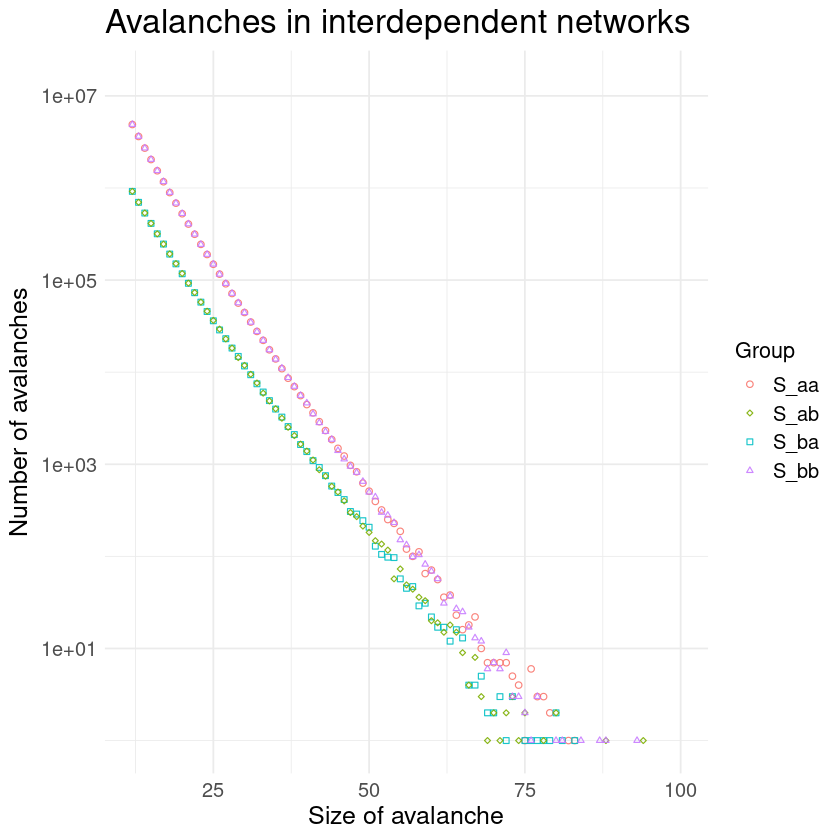

In [45]:
# Plot the data
ggplot() +
  geom_point(data = s_aa, aes(x = A_0, y = A_aa, color = "S_aa"), 
             size = 1.5, alpha = 0.9, shape=21) +
  geom_point(data = s_ba, aes(x = A_0, y = A_ba, color = "S_ba"), 
             size = 1.5, alpha = 0.9, shape=22) +
  geom_point(data = s_ab, aes(x = A_1, y = A_ab, color = "S_ab"), 
             size = 1, alpha = 0.9, shape=23) +
  geom_point(data = s_bb, aes(x = A_1, y = A_bb, color = "S_bb"), 
             size = 1, alpha = 0.9, shape=24) +
  
  scale_x_log10() +
  scale_y_log10() +
  theme_minimal() +
  labs(title = "Avalanches in interdependent networks",
       x = "Size of avalanche",
       y = "Number of avalanches",
       color = "Group") +
  xlim(12, 100) +
  theme(
    plot.title = element_text(size = 20),
    axis.title.x = element_text(size = 15),
    axis.title.y = element_text(size = 15),
    axis.text.x = element_text(size = 12),
    axis.text.y = element_text(size = 12),
    legend.text = element_text(size = 12),
    legend.title = element_text(size = 13)
  )
